# **Курс "Програмування на мові Python"**

## **Практичні зайняття №13-14**

### Тема: "Робота з файлами. Робота зі спеціальними форматами файлів"

### **1. Робота з файлами**

***Перед початком роботи завантажте усі необхідні файли!***

Робота з файлами у мовах програмування - звичайне явище. Мова Python надає широкий вибір інструментів для роботи з файлами різних типів.

Зчитування текстових файлів та запис текстових даних у файли є достатньо простим та прямолінійним. У мові Python *файловий об'єкт* створюється за допомогою вбудованої функції **open()**. Цей *файловий об'єкт* можна потім використовуватись для зчитування та запису даних у файл. Синтаксис функції open():

```
file_object = open(file_name, access_mode, buffering)
```

file_name - шлях до файлу, який буде відкрито.

access_mode - режим доступу до файлу (зчитування, запис, додавання даних тощо). Необов'язковий параметр. За замовчуванням режим доступу стоїть read (r) - для зчитування файлу.

buffering (буферизація) - ціле число. Якщо значення аргумента дорівнює 0, файл відкривається без буферизації. Якщо 1 - з порядковою буферизацією. Більше одного - процес буферизації буде виконуватись із вказаним розміром буфера (у байтах). Менше одного - розмір буфера буде дорівнювати системному.

Повний перелік можливих режимів доступу подано у таблиці:

Mode | Description
--- | ---
r | Opens a file for reading only. The file pointer is placed at the beginning of the file. This is the default mode
rb | Opens a file for reading only in binary format. The file pointer is placed at the beginning of the file. This is the default mode
r+ | Opens a file for both reading and writing. The file pointer placed at the beginning of the file
rb+ | Opens a file for both reading and writing in binary format. The file pointer placed at the beginning of the file
w | Opens a file for writing only. Overwrites the file if the file exists. If the file does not exist, creates a new file for writing
wb | Opens a file for writing only in binary format. Overwrites the file if the file exists. If the file does not exist, creates a new file for writing
w+ | Opens a file for both writing and reading. Overwrites the existing file if the file exists. If the file does not exist, creates a new file for reading and writing
wb+ | Opens a file for both writing and reading in binary format. Overwrites the existing file if the file exists. If the file does not exist, creates a new file for reading and writing
a | Opens a file for appending. The file pointer is at the end of the file if the file exists. That is, the file is in the append mode. If the file does not exist, it creates a new file for writing
ab | Opens a file for appending in binary format. The file pointer is at the end of the file if the file exists. That is, the file is in the append mode. If the file does not exist, it creates a new file for writing
a+ | Opens a file for both appending and reading. The file pointer is at the end of the file if the file exists. The file opens in the append mode. If the file does not exist, it creates a new file for reading and writing
ab+ | Opens a file for both appending and reading in binary format. The file pointer is at the end of the file if the file exists. The file opens in the append mode. If the file does not exist, it creates a new file for reading and writing



Сам по собі файловий об'єкт має кілька корисних атрибутів:

- **file.closed** - повертає True, якщо файл було закрито;

- **file.mode** - повертає режим доступу, з яким файл було відкрито;

- **file.name** - повертає назву файлу.

Метод **file.close()** призначений для того, щоб закрити файл після його використання. Виклик цього методу призведе до видалення усієї незаписаної у файл інформації та закриття посилання файлового об'єкта до самого файлу. Закривати файл після використання дуже важливо, оскільки кількість посилань, які програма може зберігати одночасно, обмежена.

Приклад:

In [3]:
file = open('myfile.txt', 'r+')
print('file.name:', file.name)
print('file.closed:', file.closed)
print('file.mode:', file.mode)
file.close()
print('file.closed now:', file.closed)

file.name: myfile.txt
file.closed: False
file.mode: r+
file.closed now: True


Щоб прочитати дані з файлу, використовують методи read(), readline() та readlines().

- Метод **read()** повертає вміст всього файлу у вигляді одного рядка. Цей метод є не дуже ефективним, оскільки зчитує увесь файл відразу. Якщо текстовий файл достатньо великий, зчитувати його краще порядково.

- Метод **readline()** зчитує наступний текстовий рядок з файлу. Рядок зчитується аж до символу переносу на новий рядок. Метод зчитує лише один рядок за раз.

- Метод **readlines()** повертає список всіх рядків файлу, і кожен елемент списку - це окремий рядок.

Важливо звернути увагу на те, що якщо рядок було зчитано за допомогою одного з попередніх трьох методів, вдруге цей сами рядок зчитати вже не можна. Тому, наприклад, метод readlines(), якщо використовувати його вдруге, поверне порожній список.

Приклад використання методу readlines(). Спочатку увесь текст з текстового файлу зчитується в програму, а потім виводиться рядок за рядком:

In [2]:
file = open('myfile.txt', 'r')
lines = file.readlines()
for line in lines:
    print(line, end='')
file.close()

line 1
line 2
line 3


Зверніть увагу на те, що за замовчуванням кожен рядок файлу завершується символом переносу рядка. Щоб текст виводився без додаткових порожніх рядків, було змінено значення параметра end у функції print().

Насправді у мові Python елементи файлового об'єкта можна безпосередньо ітерувати. На кожній новій ітерації цикл for обробляє один рядок файлу:

In [4]:
file = open('myfile.txt', 'r')
for line in file:
    print(line, end='')
file.close()

line 1
line 2
line 3


Також елементи файлу можна ітерувати за допомогою генератора списків. На відміну від методу readlines(), такий підхід дає можливість попередньо обробити дані перед збереженням у список.

У наступному прикладі усі символи рядка переводяться у верхній регістр:

In [ ]:
file = open('myfile.txt', 'r')
lines = [line.upper() for line in file]
file.close()
print(lines)

Щоб записувати рядки у файл, використовується метод **write()**. Під час створення файлового об'єкта необхідно встановити режим доступу, який дозволятиме запис у файл (наприклад, "w"). Зверніть увагу на те, що метод write() не додає символу переносу на новий рядок '/n' в кінці рядка. Це треба робити вручну.

Приклад запису даних у текстовий файл:

In [5]:
print('Writing file')
f = open('my-new-file.txt', 'w')
f.write('Hello from Python!!\n')
f.write('Working with files is easy...\n')
f.write('It is cool ...\n')
f.close()

Writing file


Якщо файлу my-new-file.txt не існує, він створюється. Якщо файл існує, він перезаписується.

Перевідка вмісту файлу:

In [6]:
file = open('my-new-file.txt', 'r')
for line in file:
    print(line, end='')
file.close()

Hello from Python!!
Working with files is easy...
It is cool ...


Щоб спростити процес читання файлу та запису нових даних, можна скористатись інструкцією **with**. Вона відкриває файл перед початком роботи та закриває файл після виконання усіх інструкцій.

Приклад:

In [ ]:
with open('my-new-file.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        print(line, end='')

Іноді може знадобитися прочитати кілька файлів за один запуск. Це можна зробити, відкриваючи кожен файл окремо, зчитуючи рядки та додаючи їх до списку. Однак є й простіший спосіб.

Модуль **fileinput** містить функцію **input()**, яка може приймати список файлів та обробляти ці файли, як один файл. Приклад:

In [ ]:
import fileinput

with fileinput.input(files=('textfile1.txt', 'textfile2.txt')) as f:
    for line in f:
        print(line, end=' ')

Розглянемо ще кілька функцій модуля fileinput.

- **filename()** - повертає назву файлу, який було відкрито.

- **lineno()** - повертає номер рядка, що був зчитаний останнім.

- **filelineno()** - повертає номер рядка у поточному файлі. До того, як було зчитано перший рядок, повертає значення 0.

- **isfirstline()** - булева (двійкова) функція, яка показує, чи є поточний рядок першим рядком у файлі.

Приклад застосування цих функцій:

In [ ]:
with fileinput.input(files=('file1.txt','file2.txt')) as f:
    for line in f:
        print(line, end='')
        print('f.filename():', f.filename())
        print('f.isfirstline():', f.isfirstline())
        print('f.lineno():', f.lineno())
        print('f.filelineno():', f.filelineno())
        print()

Для перейменуванння файлу можна використати функцію **os.rename()**. Ця функція приймає на вхід два аргументи: поточну назву файлу та нову назву. Вона є частиною модуля os, який містить багато функцій для обробки файлів. Приклад використання функції os.rename():

In [ ]:
import os

os.rename('my-new-file.txt','my-new-file-renamed.txt')

Файл можна видалити за допомогою функції **os.remove()**. Вона видаляє файл за назвою, що вказується в дужках. Приклад:

In [ ]:
import os

os.remove('my-new-file-renamed.txt')

У всіх прикладах, які розглядались досі, рядки у файлі зчитувались послідовно, починаючи з першого. Хоча такий підхід є найбільш розповсюдженим, він не єдиний. Можна також використовувати підхід *довільного доступу*.

У файлі можна зберігати вказівник (pointer), який показуватиме, на якій позиції ми знаходимось в поточний момент під час зчитування або запису даних. На початку роботи з файлом вказівник стоїть перед першим записом. Після зчитування першого рядка він переміщується на початок другого. Цю ідею проілюстровано нижче:

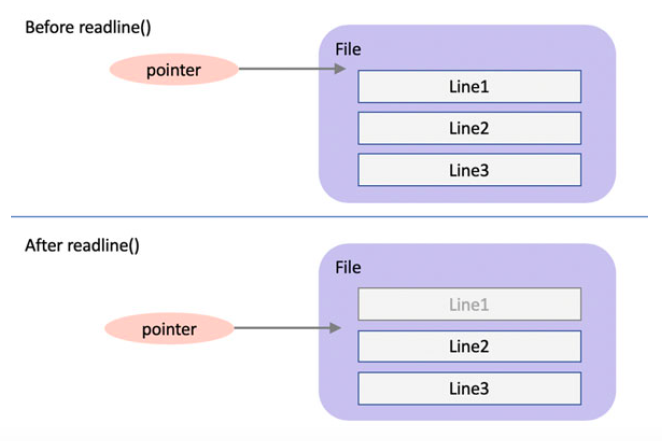

Якщо використовувати підхід довільного доступу, програміст вручну переміщує вказівник на потрібну позицію, зчитує або записує дані у відповідне місце.

Довільний доступ до файлу забезпечується функцією **seek()**, що записується так:

```
file.seek (offset, whence)
```

Параметр **offset** вказує позицію вказівника всередині файлу. Рух вказівника може бути як прямим, так і зворотним.

Параметр **whence** (необов'язковий
) вказує, відносно чого рахується зсув. Параметр може набувати значень:

- 0 - показує, що зсув відбувається відносно початку файлу (за замовчуванням);

- 1 - зсув відбувається відносно поточної позиції вказівника;

- 2 - зсув відбувається відносно кінця файлу.

У наступному прикладі створюється новий текстовий файл. У нього записується набір символів. Після запису вказівник знаходиться після символу 'z'. Функція seek() переміщує вказівник на позицію десятого символа. Починаючи з цієї позиції, вписується слово 'HELLO'. Далі вказівник переміщується на шосту позицію, вписується слово 'BOO'. Потім файл закривається. Рядки файлу виводяться всередині конструкції with as.

In [ ]:
f = open('text.txt', 'w')
f.write('abcdefghijklmnopqrstuvwxyz\n')
f.seek(10,0)
f.write('HELLO')
f.seek(6, 0)
f.write ('BOO')
f.close()
with open('text.txt', 'r') as f:
    for line in f:
        print(line, end='')

#### Допоміжні функції

Модуль os містить кілька функцій, які можуть допомогти створювати, видаляти та змінювати директорії.

- **mkdir()** - функція для створення директорій. Вона приймає на вхід назву директорії, як параметр. Якщо директорії з такою назвою вже існує, активується виключення FileExistsError.

- **chdir()** - функції, що може використовуватись для зміни поточної робочої директорії. Це директорія, з якою програма працює за замовчуванням.

- **getcwd()** - функція, що повертає назву поточної робочої директорії.

- **rmdir()** - функції, що використовується для видалення директорії. Вона приймає на вхід назву директорії, що має бути видалена.

- **listdir()** - функція, що повертає список файлів та папок, які містяться у директорії, вказаної як параметр функції.

Простий приклад, що ілюструє роботу цих функцій:

In [ ]:
import os
print('os.getcwd(:', os.getcwd())
print('List contents of directory')
print(os.listdir())
print('Create mydir')
os.mkdir('mydir')
print('List the updated contents of directory')
print(os.listdir())
print('Change into mydir directory')
os.chdir('mydir')
print('os.getcwd(:', os.getcwd())
print('Change back to parent directory')
os.chdir('..')
print('os.getcwd(:', os.getcwd())
print('Remove mydir directory')
os.rmdir('mydir')
print('List the resulting contents of directory')
print(os.listdir())

Зверніть увагу на те, що параметр '..' функції chdir() вказує на батьківську директорію. Параметр '.' вказував би на поточну директорію.

### **2. Робота з CSV-файлами**

Формат **CSV** (Comma Separated Values) - найбільш використовуваний формат для імпортування та експортування електронних таблиць та баз даних. CSV не є універсальним стандартом для всіх застосунків, що можуть мати свої специфічні норми та стандарти.

Поля у CSV-файлі розділені комами та символами переносу на новий рядок.

Для прикладу завантажимо файл titanic.csv (для цього скористаємось функцією **get()** модуля **requests**), та запишемо його вміст у список titanic.

In [ ]:
import requests

r = requests.get('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv', allow_redirects=True)
open('titanic.csv', 'wb').write(r.content)

In [ ]:
import re

titanic = []
with open('titanic.csv', 'r') as f:
    lines = f.readlines()
    for line in lines:
        new_line = line.replace('\n', '')
        split = re.split(',',new_line)
        titanic.append(split)
        print(split)

Однак є простіший спосіб роботи з CSV-файлами. Модуль csv містить функції, призначені для автоматичного зчитування та запису даних у CSV-файл. Деякі з цих функції наведені нижче.

- **csv.reader (csvfile, dialect='excel',** **fmtparams)** - повертає об'єкт, що ітерується. На кожній ітерації повертає один рядок файлу. dialect - необов'язковий параметр, в якому вказується діалект (різновид структури) CSV-файлу, який буде використаний (усі діалекти подані у таблиці нижче). Аргумент fmtparams (також необов'язковий) може бути використаний для перезапису параметрів форматування поточного діалекту.

- **csv.writer (csvfile, dialect='excel',** **fmtparams)** - повертає об'єкт, що ітерується, призначений для конвертації користувацьких даних у формат CSV.

- **csv.list_dialects()** - повертає назви усіх можливих діалектів.

Перелік усіх наявних у Python діалектів:

Parameter	| excel	| excel-tab	| unix
--- | --- | --- | ---
delimiter	| ,	| \t	| ,
doublequote	| True	| True	| True
escapechar	| None	| None	| None
lineterminator	| \r\n	| \r\n	| \n
quotechar	| "	| "	| "
quoting	| csv.QUOTE_MINIMAL	| csv.QUOTE_MINIMAL	| csv.QUOTE_ALL
skipinitialspace	| False	| False	| False
strict | False	| False	| False

З функції csv.writer() можна отримати ще 3 методи: **writerow()**, **writerows()** та **dialect**.

- **csvwriter.writerow(row)** - записує рядок row, форматований відповідно до поточного діалекту, у файловий об'єкт.

- **csvwriter.writerows(rows)** - записує всі рядки у файловий об'єкт.

- **csvwriter.dialect** - опис діалекту, що використовується.

Рзглянемо приклад. За замовчуванням буде використовуватсь діалект 'excel' (файл можна буде потім відкрити у програмі Microsoft Excel).

In [ ]:
import csv

print('Crearting CSV file')
with open('sample.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['She Loves You', 'Sept 1963'])
    writer.writerow(['I Want to Hold Your Hand', 'Dec 1963'])
    writer.writerow(['Cant Buy Me Love', 'Apr 1964'])
    writer.writerow(['A Hard Days Night', 'July 1964'])

Функція **csv.reader()** використовується разом із циклом for для порядкового зчитування даних з файлу. Вона містить такі додаткові методи:

- **csvreader.dialect** - опис діалекту, що використовується.

- **csvreader.line_num** - повертає кількість рядків, отриманих з ітератора.

Приклад використання функції csv.reader():

In [ ]:
print('Starting to read csv file')
with open('sample.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        print(*row, sep=', ')
print('Done Reading')

Дуже часто перший рядок CSV-файлу містить назви полів таблиці. Зберігати цю інформацію дуже корисно, щоб потім у відповідний спосіб формувати дані, зчитані з CSV-файлу або записані у CSV-файл.

Функція **csv.DictWriter()** повертає об'єкт, що може використовуватись для запису значень у CSV-файл з використанням іменованих колонок. Приклад:

In [ ]:
import csv
with open('names.csv', 'w', newline='') as csvfile:
    fieldnames = ['first_name', 'last_name', 'result']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerow({'first_name': 'John',
                     'last_name': 'Smith',
                     'result' : 54})
    writer.writerow({'first_name': 'Jane',
                     'last_name': 'Lewis',
                     'result': 63})
    writer.writerow({'first_name': 'Chris',
                     'last_name': 'Davies',
                     'result' : 72})

Зверніть увагу, що список заголовків задається під час виклику функції DictWriter().

Метод **writeheader()** використовується для запису рядка із заголовками у CSV-файл.

Метод **writerow()** приймає на вхід словник, ключі якого мають відповідати назвам колонок. Порядок елемнтів у словнику не має значення. Значення, що відповідають ключам, записуються на відповідні позиції у CSV-файлі.

Якщо файлу names.csv не існує, він створюється автоматично.

Разом з функцією csv.DictWriter(), яка використовується для запису файлу з назвами колонок, існує функція **csv.DictReader()**, яка зчитує ці файли.

**fieldnames** - параметр функції csv.DictReader(), що зберігає список ключів (заголовків) CSV-файлу (перший рядок файлу).

Приклад для текстового файлу names.csv наведено нижче:

In [ ]:
import csv
print('Starting to read dict CSV example')
with open('names.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for heading in reader.fieldnames:
        print(heading, end=' ')
    print('\n------------------------------')
    for row in reader:
        print(row['first_name'], row['last_name'], row['result'])
print('Done')

### **3. Робота з JSON-файлами**

**JSON-файл** (JavaScript Object Notation File) - це розповсюджений формат даних, що використовується для збереження структурованих даних. Він базується на двох структурах даних: словник та список.

У мові Python JSON-об'єкт зберігається у вигляді рядка. Наприклад:

In [ ]:
p = '{"name": "Bob", "languages": ["Python", "Java"]}'

Щоб працювати з JSON-рядками (або файлами, що зберігають JSON-об'єкт), необхідно імпортувати модуль **json**.

Щоб перетворити JSON-рядок у словник, можна застосувати метод **json.loads()**. У наступному прикладі person - це JSON-рядок, person_dict - словник.

In [ ]:
import json

person = '{"name": "Bob", "languages": ["English", "Fench"]}'
person_dict = json.loads(person)

print(person_dict)
print(person_dict['languages'])

Для читання файлу, що зберігає JSON-об'єкт, можна скористатись методом **json.load()**. Якщо існує файл person.json, прочитати його можна так:

In [ ]:
import json

with open('person.json') as f:
    data = json.load(f)

print(data)

Щоб конвертувати словник у JSON-рядок, можна скористатись методом **json.dumps()**:

In [ ]:
import json

person_dict = {'name': 'Bob',
'age': 12,
'children': None
}
person_json = json.dumps(person_dict)

print(person_json)

У таблиці подано об'єкти Python та їхні відповідники у JSON.

Python | JSON Equivalent
--- | ---
dict	| object
list, tuple	| array
str	| string
int, float, int	| number
True	| true
False	| false
None	| null

Щоб записати словник у текстовий файл, можна застосувати метод **json.dump()**:

In [ ]:
import json

person_dict = {"name": "Bob",
"languages": ["English", "Fench"],
"married": True,
"age": 32
}

with open('person.json', 'w') as json_file:
    json.dump(person_dict, json_file)

Перевірка записаних даних:

In [ ]:
with open('person.json') as f:
    data = json.load(f)

print(data)

Щоб роздрукувати JSON-об'єкт у більш читабельному вигляді, до методів json.dumps() та json.dump() додають додаткові параметри **indent** та **sort_keys**.

Параметр indent зберігає кількість пробілів для відступу (за замовчуванням - None).

Параметр sort_keys може набувати значеннь True або False в залежності від того, чи потрібно сортувати ключі словника в алфавітному порядку.

Приклад:

In [ ]:
import json

person_string = '{"name": "Bob", "languages": "English", "numbers": [2, 1.6, null]}'
person_dict = json.loads(person_string)

print(json.dumps(person_dict, indent = 4, sort_keys=True))